In [48]:
import pandas as pd
import numpy as np
import scipy.io
import statsmodels.api as sm

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

In [49]:
df = pd.read_csv("./output/cross-section.csv")

In [50]:
df.head()

,income,assets,homeshare,expenditure,x1,x2
0,6.013505,4.222222,0.882628,1.924797,-0.275354,-3.065672
1,6.923836,4.136364,0.924458,2.339060,-0.159262,-2.889981
2,7.358342,4.565657,0.923647,2.378038,-0.159831,-2.866985
3,6.875767,5.080808,0.924553,2.334716,-0.159380,-2.895368
4,7.358342,4.565657,0.923647,2.378038,-0.159831,-2.866985


In [51]:
poor = df.expenditure < df.expenditure.quantile(0.25)

rich = df.expenditure > df.expenditure.quantile(0.75)

In [52]:
print("Rich Home Share: ", round(1 - df.homeshare[rich].median(), 3))

print("Poor Home Share: ", round(1 - df.homeshare[poor].median(), 3))

print("Rich Elasticity: ", round(df.x2[rich].median(), 3))

print("Poor Elasticity: ", round(df.x2[poor].median(), 3))

Rich Home Share:  0.092
Poor Home Share:  0.109
Rich Elasticity:  -3.576
Poor Elasticity:  -6.422


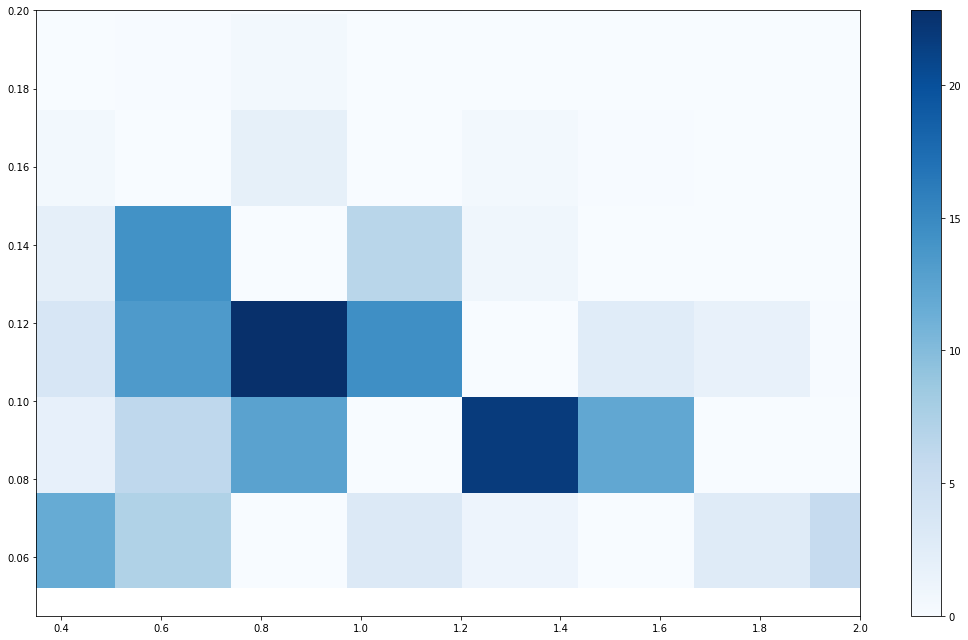

In [53]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (1 - df.homeshare), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

ax.set_ylim(0.045,0.20)
ax.set_xlim(0.35,2.0)

plt.show()

In [54]:
#define response variable
y = (1 - df.homeshare)

#define predictor variables
x = df.expenditure

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              homeshare   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3367.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:26:38   Log-Likelihood:             2.2901e+05
No. Observations:              100000   AIC:                        -4.580e+05
Df Residuals:                   99998   BIC:                        -4.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1111      0.000    576.778      

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


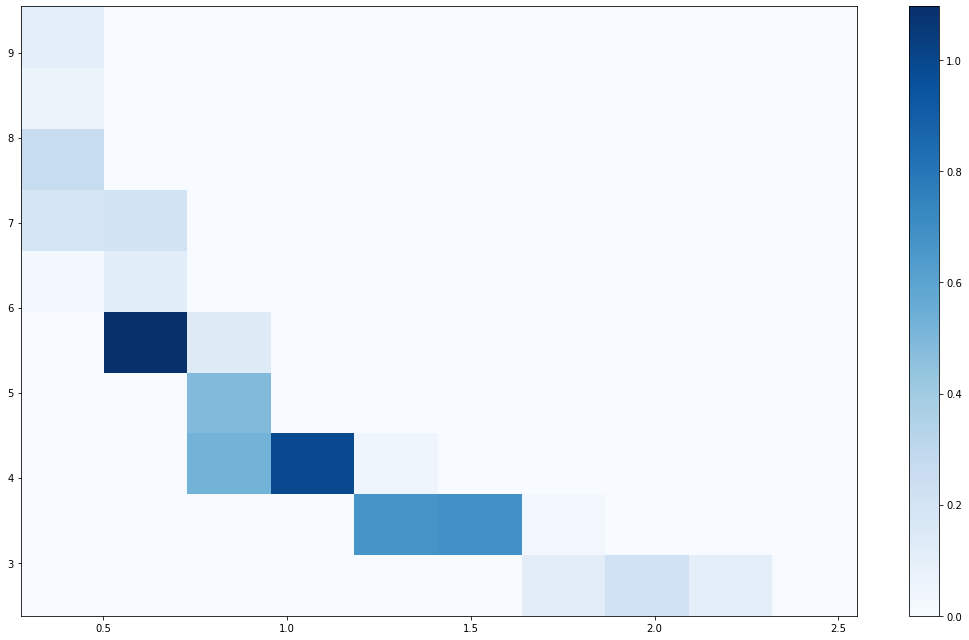

In [47]:
fig, ax = plt.subplots(figsize = [15.0,9.0], tight_layout = True)

h = ax.hist2d(df.expenditure, (- df.x2), bins=10, cmap='Blues', density = True)

fig.colorbar(h[3], ax=ax)

plt.show()